In [4]:
from topologicpy.Vertex import Vertex
from topologicpy.Face import Face
from topologicpy.Cell import Cell
from topologicpy.CellComplex import CellComplex
from topologicpy.Cluster import Cluster
from topologicpy.Topology import Topology
from topologicpy.Dictionary import Dictionary
from topologicpy.Color import Color
from topologicpy.Plotly import Plotly
from topologicpy.Graph import Graph
from topologicpy.Vector import Vector

from topologicpy.Helper import Helper

In [5]:
class Space():
    def __init__(self, name, w, l, h):
        self.name = name
        self.w = w
        self.l = l
        self.h = h


    

In [198]:
general_width = 6.5
general_height = 3.0
corridor_width = 1.0

parking = Space("Parking", general_width, 6, general_height)
living = Space("Living Room", general_width, 7, general_height)
stairs = Space("Stairs", 1.5, 5.5, general_height * 2)
corridor1 = Space("Corridor 1", corridor_width, 5.5, general_height)
patio = Space("Patio", general_width - stairs.w - corridor1.w, stairs.l, general_height*2)
wc1 = Space("WC1", stairs.w, 1.2, general_height)
wc2 = Space("WC2", stairs.w, 1.2, general_height)
service = Space("Service", stairs.w, 2.5, general_height)
dining = Space("Dinning Room", general_width - wc1.w, wc1.l+wc2.l+service.l, general_height)
kitchen = Space("Kitche", 1.8, dining.l, general_height)

corridor2 = Space("Corridor 2", corridor_width, 5.5, general_height)
corridor3 = Space("Corridor 3", general_width, corridor_width, general_height)
corridor4 = Space("Corridor 4", general_width, corridor_width, general_height)
bedroom1 = Space("Room 1", general_width, living.l - corridor3.l, general_height)
bedroom2 = Space("Room 2", general_width, dining.l - corridor3.l, general_height)


In [155]:
has_patio = True
has_bedroom1 = True
has_bedroom2 = False

In [214]:
def getSelectors(cell, keys, values):
    if not cell:
        return None
    # selectors = []
    s = Topology.InternalVertex(cell)
    d = Dictionary.ByKeysValues(keys, values)
    s = Topology.SetDictionary(s, d)
    # selectors.append(s)
    return s

def createAperture(room1, room2, is_full=True):
    names = [room1, room2]
    names_sel = []
    for sel in selectors:
        if sel.GetDictionary().Values()[1].StringValue() == room1:
            names_sel.append(sel)
    for sel in selectors:
        if sel.GetDictionary().Values()[1].StringValue() == room2:
            names_sel.append(sel)
    names_sel
    print(names_sel)

    if not names_sel:
        return

    sub1 = Topology.SelectSubTopology(house, names_sel[0], subTopologyType="cell")
    sub2 = Topology.SelectSubTopology(house, names_sel[1], subTopologyType="cell")
    print(f'{room1} has {len(Cell.Faces(sub1))} faces   |   {room2} has {len(Cell.Faces(sub2))} faces')
    shared = Topology.SharedFaces(sub1, sub2)
    # aperture = Topology.Copy(shared[0])
    aperture = shared[0]
    print(aperture)

    if is_full:
        return aperture
    else:
        bottom_edge = Face.Edges(aperture)[0]
        for edge in Face.Edges(aperture):
            if Topology.Centroid(edge).Z() < Topology.Centroid(bottom_edge).Z():
                bottom_edge = edge
            
        return Topology.Scale(aperture, x=0.5, z=0.8, origin=Topology.Centroid(bottom_edge))

In [215]:
selectors = []
cells = []
apertures = []

parking_tp = Cell.Prism(width=parking.w, length=parking.l, height=parking.h, placement="lowerleft")
selectors.append(getSelectors(parking_tp, ["label", "title"], [0, parking.name]))
cells.append(parking_tp)

living_tp = Cell.Prism(width=living.w, length=living.l, height=living.h, placement="lowerleft")
living_tp = Topology.Translate(living_tp, 0, parking.l, 0)
selectors.append(getSelectors(living_tp, ["label", "title"], [1, living.name]))
cells.append(living_tp)

house = Topology.Boolean(parking_tp, living_tp, operation="merge")

stairs_tp = Cell.Prism(width=stairs.w, length=stairs.l, height=stairs.h, placement="lowerleft")
stairs_tp = Topology.Translate(stairs_tp, 0, parking.l + living.l, 0)
selectors.append(getSelectors(stairs_tp, ["label", "title"], [2, stairs.name]))
cells.append(stairs_tp)

house = Topology.Boolean(house, stairs_tp, operation="merge")

corridor1_tp = Cell.Prism(width=corridor1.w, length=corridor1.l, height=corridor1.h, placement="lowerleft")
corridor1_tp = Topology.Translate(corridor1_tp, stairs.w, parking.l + living.l, 0)
selectors.append(getSelectors(corridor1_tp, ["label", "title"], [3, corridor1.name]))
cells.append(corridor1_tp)

house = Topology.Boolean(house, corridor1_tp, operation="merge")

if has_patio:
    wc1_tp = Cell.Prism(width=wc1.w, length=wc1.l, height=wc1.h, placement="lowerleft")
    wc1_tp = Topology.Translate(wc1_tp, 0, parking.l + living.l + stairs.l, 0)
    selectors.append(getSelectors(wc1_tp, ["label", "title"], [4, wc1.name]))
    cells.append(wc1_tp)
    house = Topology.Boolean(house, wc1_tp, operation="merge")
    
    wc2_tp = Cell.Prism(width=wc2.w, length=wc2.l, height=wc2.h, placement="lowerleft")
    wc2_tp = Topology.Translate(wc2_tp, 0, parking.l + living.l + stairs.l + wc1.l, 0)
    selectors.append(getSelectors(wc2_tp, ["label", "title"], [4, wc2.name]))
    cells.append(wc2_tp)
    
    house = Topology.Boolean(house, wc2_tp, operation="merge")
    
    service_tp = Cell.Prism(width=service.w, length=service.l, height=service.h, placement="lowerleft")
    service_tp = Topology.Translate(service_tp, 0, parking.l + living.l + stairs.l + wc1.l + wc2.l, 0)
    selectors.append(getSelectors(service_tp, ["label", "title"], [5, service.name]))
    cells.append(service_tp)
    house = Topology.Boolean(house, service_tp, operation="merge")

    patio_tp = Cell.Prism(width=patio.w, length=patio.l, height=patio.h, placement="lowerleft")
    patio_tp = Topology.Translate(patio_tp, stairs.w + corridor1.w, parking.l + living.l, 0)
    selectors.append(getSelectors(patio_tp, ["label", "title"], [6, patio.name]))
    cells.append(patio_tp)
    house = Topology.Boolean(house, patio_tp, operation="merge")
    
    dining_tp = Cell.Prism(width=dining.w, length=dining.l, height=dining.h, placement="lowerleft")
    dining_tp = Topology.Translate(dining_tp, wc1.w, parking.l + living.l + stairs.l, 0)
    selectors.append(getSelectors(dining_tp, ["label", "title"], [7, dining.name]))
    cells.append(dining_tp)
    house = Topology.Boolean(house, dining_tp, operation="merge")

    kitchen_tp = Cell.Prism(width=kitchen.w, length=kitchen.l, height=kitchen.h, placement="lowerleft")
    kitchen_tp = Topology.Translate(kitchen_tp, general_width - kitchen.w, parking.l + living.l + stairs.l, 0)
    selectors.append(getSelectors(kitchen_tp, ["label", "title"], [8, kitchen.name]))
    cells.append(kitchen_tp)
    house = Topology.Boolean(house, kitchen_tp, operation="merge")
else:
    dining_tp = Cell.Prism(width=general_width - (stairs.w + corridor1.w), length=stairs.l, height=dining.h, placement="lowerleft")
    dining_tp = Topology.Translate(dining_tp, stairs.w + corridor1.w, parking.l + living.l, 0)
    selectors.append(getSelectors(dining_tp, ["label", "title"], [7, dining.name]))
    cells.append(dining_tp)
    house = Topology.Boolean(house, dining_tp, operation="merge")

    kitchen_tp = Cell.Prism(width=kitchen.w, length=stairs.l, height=kitchen.h, placement="lowerleft")
    kitchen_tp = Topology.Translate(kitchen_tp, general_width - kitchen.w, parking.l + living.l, 0)
    selectors.append(getSelectors(kitchen_tp, ["label", "title"], [8, kitchen.name]))
    cells.append(kitchen_tp)
    house = Topology.Boolean(house, kitchen_tp, operation="merge")

# Second Floor

corridor2_tp = Cell.Prism(width=corridor2.w, length=corridor2.l, height=corridor2.h, placement="lowerleft")
corridor2_tp = Topology.Translate(corridor2_tp, stairs.w, parking.l + living.l, general_height)
selectors.append(getSelectors(corridor2_tp, ["label", "title"], [3, corridor2.name]))
cells.append(corridor2_tp)

house = Topology.Boolean(house, corridor2_tp, operation="merge")

if has_bedroom1:
    corridor3_tp = Cell.Prism(width=corridor3.w, length=corridor3.l, height=corridor3.h, placement="lowerleft")
    corridor3_tp = Topology.Translate(corridor3_tp, 0, parking.l + living.l - corridor3.l, general_height)
    selectors.append(getSelectors(corridor3_tp, ["label", "title"], [3, corridor3.name]))
    cells.append(corridor3_tp)
    
    house = Topology.Boolean(house, corridor3_tp, operation="merge")
    
    bedroom1_tp = Cell.Prism(width=bedroom1.w, length=bedroom1.l, height=bedroom1.h, placement="lowerleft")
    bedroom1_tp = Topology.Translate(bedroom1_tp, 0, parking.l, general_height)
    selectors.append(getSelectors(bedroom1_tp, ["label", "title"], [9, bedroom1.name]))
    cells.append(bedroom1_tp)
    
    house = Topology.Boolean(house, bedroom1_tp, operation="merge")

if has_bedroom2:
    if has_patio:
        corridor4_tp = Cell.Prism(width=corridor4.w, length=corridor4.l, height=corridor4.h, placement="lowerleft")
        corridor4_tp = Topology.Translate(corridor4_tp, 0, parking.l + living.l + corridor2.l, general_height)
        selectors.append(getSelectors(corridor4_tp, ["label", "title"], [3, corridor4.name]))
        cells.append(corridor4_tp)
    
        house = Topology.Boolean(house, corridor4_tp, operation="merge")
    
        bedroom2_tp = Cell.Prism(width=bedroom2.w, length=bedroom2.l, height=bedroom2.h, placement="lowerleft")
        bedroom2_tp = Topology.Translate(bedroom2_tp, 0, parking.l + living.l + patio.l + corridor4.l, general_height)
        selectors.append(getSelectors(bedroom2_tp, ["label", "title"], [9, bedroom2.name]))
        cells.append(bedroom2_tp)
    
        house = Topology.Boolean(house, bedroom2_tp, operation="merge")

# Apertures
apertureA = createAperture("Parking", "Living Room", False)
apertures.append(apertureA)

apertureB = createAperture("Living Room", "Stairs", True)
apertures.append(apertureB)

apertureC = createAperture("Living Room", "Corridor 1", True)
apertures.append(apertureC)

apertureD = createAperture("Stairs", "Corridor 2", True)
apertures.append(apertureD)

apertureE = createAperture("Corridor 2", "Corridor 3", True)
apertures.append(apertureE)

apertureF = createAperture("Corridor 3", "Room 1", False)
apertures.append(apertureF)


[<topologic_core.Vertex object at 0x7f2acdebb9b0>, <topologic_core.Vertex object at 0x7f2acded08f0>]
Parking has 6 faces   |   Living Room has 9 faces
[<topologic_core.Vertex object at 0x7f2acded08f0>, <topologic_core.Vertex object at 0x7f2acdeb7b70>]
Living Room has 9 faces   |   Stairs has 9 faces
[<topologic_core.Vertex object at 0x7f2acded08f0>, <topologic_core.Vertex object at 0x7f2acded2570>]
Living Room has 9 faces   |   Corridor 1 has 6 faces
[<topologic_core.Vertex object at 0x7f2acdeb7b70>, <topologic_core.Vertex object at 0x7f2acdf61730>]
Stairs has 9 faces   |   Corridor 2 has 6 faces
[<topologic_core.Vertex object at 0x7f2acdf61730>, <topologic_core.Vertex object at 0x7f2acdf60c70>]
Corridor 2 has 6 faces   |   Corridor 3 has 8 faces
[<topologic_core.Vertex object at 0x7f2acdf60c70>, <topologic_core.Vertex object at 0x7f2acdf60d70>]
Corridor 3 has 8 faces   |   Room 1 has 6 faces


In [200]:
Topology.Show(cells+apertures, renderer='jupyterlab', showVertices=False, faceColor="#FFFFFF", backgroundColor="#777777")

In [213]:
apertures

[]

In [217]:
selectors = Helper.Flatten(selectors)
cells = Helper.Flatten(cells)
house = CellComplex.ByCells(cells)
house = Topology.TransferDictionariesBySelectors(house, selectors, tranCells=True)
house = Topology.AddApertures(house, apertures, subTopologyType="face", exclusive=True)


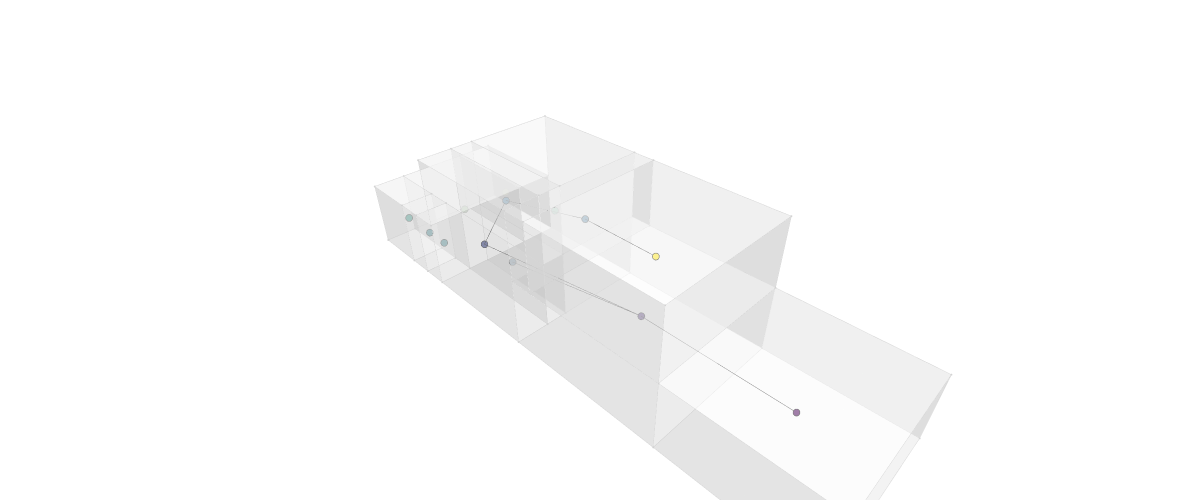

In [218]:
g = Graph.ByTopology(house, direct=False, directApertures=True)
graph_data = Plotly.DataByGraph(g, vertexSize=4, vertexGroupKey="label", vertexLabelKey="title", vertexGroups=[0,1,2,3,4,5,6,7,8,9])
bldg_data = Plotly.DataByTopology(house, faceOpacity=0.5, edgeColor="lightgrey", vertexColor="lightgrey")
fig = Plotly.FigureByData(graph_data+bldg_data)
Plotly.Show(fig, renderer='jupyterlab')

In [35]:
Graph.ExportToCSV(g, "./data", 0, overwrite=True)

True

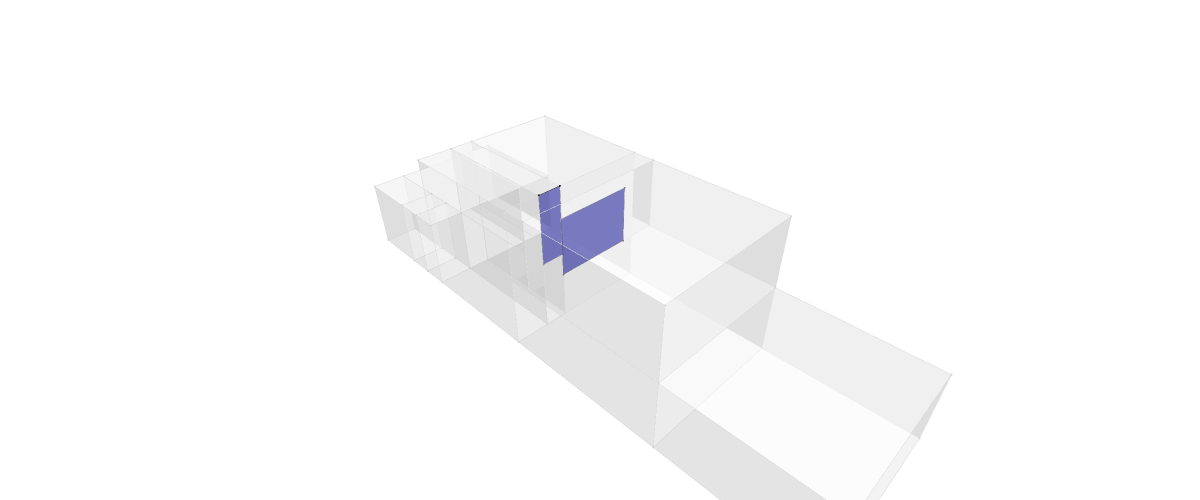

In [216]:
shared_data= [Plotly.DataByTopology(aperture, faceColor="#000099") for aperture in apertures]
# shared_data.append(bldg_data)
fig = Plotly.FigureByData(bldg_data+shared_data[-2]+shared_data[-1])
Plotly.Show(fig, renderer='jupyterlab')
# Topology.Show(adj, renderer='jupyterlab', showVertices=False, faceColor="#FFFFFF", backgroundColor="#777777")
